In [1]:
from zipfile import ZipFile
file_name = 'drive/MyDrive/SDP_Datasets/blood-cell.zip'

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [40]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [41]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

In [42]:
train_path = "blood-cell/train"
valid_path = "blood-cell/test"

In [44]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58892288/58889256 [==============================] - 0s 0us/step


In [45]:
# Model is already trained, don't train existing weights again
for layer in vgg.layers:
    layer.trainable = False

In [46]:
# useful for getting number of classes of dataset
folders = glob('blood-cell/train/*')
len(folders)

4

In [47]:
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)

In [48]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [49]:
# view the structure of the model
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [50]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [51]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2) # set validation split

training_set = train_datagen.flow_from_directory("blood-cell/train",
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',
                                                 subset='training')

test_set = train_datagen.flow_from_directory("blood-cell/train",
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical',
                                            subset='validation')

Found 7968 images belonging to 4 classes.
Found 1989 images belonging to 4 classes.


In [52]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs = 20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
249/249 [==============================] - 114s 448ms/step - loss: 1.3172 - accuracy: 0.4676 - val_loss: 0.7031 - val_accuracy: 0.7315
Epoch 2/20
249/249 [==============================] - 110s 444ms/step - loss: 0.5996 - accuracy: 0.7895 - val_loss: 0.6320 - val_accuracy: 0.7491
Epoch 3/20
249/249 [==============================] - 111s 444ms/step - loss: 0.4502 - accuracy: 0.8428 - val_loss: 0.4265 - val_accuracy: 0.8577
Epoch 4/20
249/249 [==============================] - 110s 443ms/step - loss: 0.3826 - accuracy: 0.8620 - val_loss: 0.3370 - val_accuracy: 0.8949
Epoch 5/20
249/249 [==============================] - 110s 443ms/step - loss: 0.3056 - accuracy: 0.8930 - val_loss: 0.3236 - val_accuracy: 0.8894
Epoch 6/20
249/249 [==============================] - 111s 444ms/step - loss: 0.2678 - accuracy: 0.9090 - val_loss: 0.2826 - val_accuracy: 0.8999
Epoch 7/20
249/249 [==============================] - 110s 443ms/step - loss: 0.2314 - accuracy: 0.9254 - val_loss: 0.3053 -

In [53]:
from keras.models import load_model
model.save('blood-cell-model.h5')

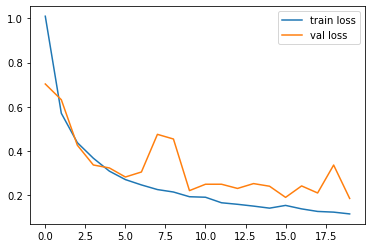

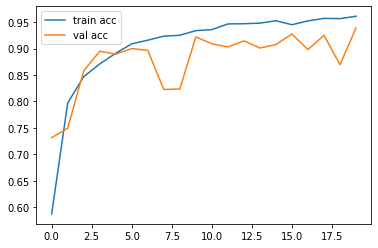

<Figure size 432x288 with 0 Axes>

In [54]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')